# Random Forest Classification - Loan

In [6]:
# Points to get across
# How it works & Decision Tree - multi class model
# Feature Selection & Feature Importance  & Type of features it can take
# Light feature engineering
# Grid Search
# Imbalance Class & How it relates to business
# Use case

## Company Information:
Lending Club is a peer to peer lending company based in the United States, in which investors provide funds for potential borrowers and investors earn a profit depending on the risk they take (the borrowers credit score). Lending Club provides the "bridge" between investors and borrowers.

## Let's make a classifiaction model to detect if a "new" loan will be good or bad

In [7]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
# Import Data
loan = pd.read_csv('../data/prep_loan.csv', low_memory=False)
loan.head()

,purpose,verification_status,loan_amnt,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,inq_last_6mths,open_acc,total_acc,pub_rec,revol_util,revol_bal,addr_state,term,loan_condition,loan_condition_num
0,credit_card,Verified,5000.0,10.65,162.87,B,B2,10+ years,RENT,24000.0,...,1.0,3.0,9.0,0.0,83.7,13648.0,AZ,36 months,Good,0
1,car,Source Verified,2500.0,15.27,59.83,C,C4,< 1 year,RENT,30000.0,...,5.0,3.0,4.0,0.0,9.4,1687.0,GA,60 months,Bad,1
2,small_business,Not Verified,2400.0,15.96,84.33,C,C5,10+ years,RENT,12252.0,...,2.0,2.0,10.0,0.0,98.5,2956.0,IL,36 months,Good,0
3,other,Source Verified,10000.0,13.49,339.31,C,C1,10+ years,RENT,49200.0,...,1.0,10.0,37.0,0.0,21.0,5598.0,CA,36 months,Good,0
4,wedding,Source Verified,5000.0,7.90,156.46,A,A4,3 years,RENT,36000.0,...,3.0,9.0,12.0,0.0,28.3,7963.0,AZ,36 months,Good,0


In [9]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40575 entries, 0 to 40574
Data columns (total 21 columns):
purpose                40575 non-null object
verification_status    40575 non-null object
loan_amnt              40575 non-null float64
int_rate               40575 non-null float64
installment            40575 non-null float64
grade                  40575 non-null object
sub_grade              40575 non-null object
emp_length             40575 non-null object
home_ownership         40575 non-null object
annual_inc             40575 non-null float64
dti                    40575 non-null float64
inq_last_6mths         40575 non-null float64
open_acc               40575 non-null float64
total_acc              40575 non-null float64
pub_rec                40575 non-null float64
revol_util             40575 non-null float64
revol_bal              40575 non-null float64
addr_state             40575 non-null object
term                   40575 non-null object
loan_condition         40

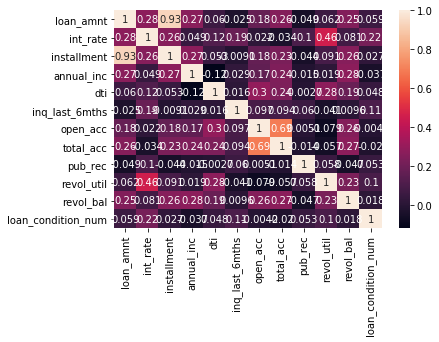

In [10]:
# Check correlations & other visualization
sns.heatmap(loan.corr(), annot=True)

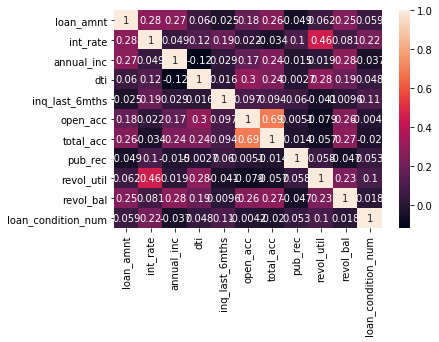

In [11]:
# Drop installment
loan = loan.drop(columns=['installment'])
sns.heatmap(loan.corr(), annot=True)

In [12]:
# Identify what information we know when initiating a loan
# purpose
# verification_status
# loan_amnt
# int_rate
# installment
# grade
# sub_grade
# emp_length
# home_ownership
# annual_inc
# dti, dti_joint
# inq_last_6mths
# mths_since_last_delinq
# open_acc / total_acc
# pub_rec
# revol_util
# revol_bal
# addr_state
# term
# issue_d
feature_selected = ['purpose', 'verification_status', 'loan_amnt', 'int_rate', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'dti', 'inq_last_6mths', 'open_acc', 'total_acc', 'pub_rec', 'revol_util', 'revol_bal', 'addr_state', 'term', 'loan_condition', 'loan_condition_num']
x_feature = ['purpose', 'verification_status', 'loan_amnt', 'int_rate', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'dti', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'revol_bal', 'addr_state', 'term']
y_feature = 'loan_condition'
loan = loan[feature_selected]
loan.head()

,purpose,verification_status,loan_amnt,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,dti,inq_last_6mths,open_acc,total_acc,pub_rec,revol_util,revol_bal,addr_state,term,loan_condition,loan_condition_num
0,credit_card,Verified,5000.0,10.65,B,B2,10+ years,RENT,24000.0,27.65,1.0,3.0,9.0,0.0,83.7,13648.0,AZ,36 months,Good,0
1,car,Source Verified,2500.0,15.27,C,C4,< 1 year,RENT,30000.0,1.00,5.0,3.0,4.0,0.0,9.4,1687.0,GA,60 months,Bad,1
2,small_business,Not Verified,2400.0,15.96,C,C5,10+ years,RENT,12252.0,8.72,2.0,2.0,10.0,0.0,98.5,2956.0,IL,36 months,Good,0
3,other,Source Verified,10000.0,13.49,C,C1,10+ years,RENT,49200.0,20.00,1.0,10.0,37.0,0.0,21.0,5598.0,CA,36 months,Good,0
4,wedding,Source Verified,5000.0,7.90,A,A4,3 years,RENT,36000.0,11.20,3.0,9.0,12.0,0.0,28.3,7963.0,AZ,36 months,Good,0


## Transform Category to number
i.e.,
- A -> 1  0  0
- B -> 0  1  0
- C -> 0  0  1
- A -> 1  0  0

drop_first = true , cut one column the results still correct 
- M -> 0 1
- F -> 1 0


In [17]:
# Transform -- From Cat to dummy variables
categories = ['purpose', 'verification_status', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'addr_state', 'term']
raw_model_data = pd.get_dummies(loan.copy(), columns=categories,drop_first=True)
raw_model_data.head()

,loan_amnt,int_rate,annual_inc,dti,inq_last_6mths,open_acc,total_acc,pub_rec,revol_util,revol_bal,...,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,term_ 60 months
0,5000.0,10.65,24000.0,27.65,1.0,3.0,9.0,0.0,83.7,13648.0,...,0,0,0,0,0,0,0,0,0,0
1,2500.0,15.27,30000.0,1.00,5.0,3.0,4.0,0.0,9.4,1687.0,...,0,0,0,0,0,0,0,0,0,1
2,2400.0,15.96,12252.0,8.72,2.0,2.0,10.0,0.0,98.5,2956.0,...,0,0,0,0,0,0,0,0,0,0
3,10000.0,13.49,49200.0,20.00,1.0,10.0,37.0,0.0,21.0,5598.0,...,0,0,0,0,0,0,0,0,0,0
4,5000.0,7.90,36000.0,11.20,3.0,9.0,12.0,0.0,28.3,7963.0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Scikit Learn
from sklearn.model_selection import train_test_split

X = raw_model_data.drop(columns=['loan_condition', 'loan_condition_num'],axis=1)
y = raw_model_data['loan_condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [20]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=600,random_state=1997)

rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=1997, verbose=0,
            warm_start=False)

In [30]:
predictions = rfc.predict(X_test)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        Bad       0.53      0.02      0.03      1944
       Good       0.84      1.00      0.91     10229

avg / total       0.79      0.84      0.77     12173



## Confusion Matrix
             Row = Actual          Column = Prediction 
| Tables        | Bad           | Good  |
| ------------- |:-------------:| -----:|
| Bad     | 31 | 1913 |
| Good      | 28      |   10201 |


* Precision = ทำนายเป็นที่ตั้ง
* Recall = ความจริงเป็นที่ตั้ง

In [32]:
print(confusion_matrix(y_test,predictions))

[[   31  1913]
 [   28 10201]]


In [26]:
# What can we make from these results? 
# For Every 100 Loans 
# (Only when we predict "yes", 1880/(1880 + 10217) % will be bad loans)

# Can we use this model? 
# If yes then how? 
# If no, then what do we need to do?

# Plot the avg loan size by loan_condition
# Plot the weighted avg Int rate by loan_condition

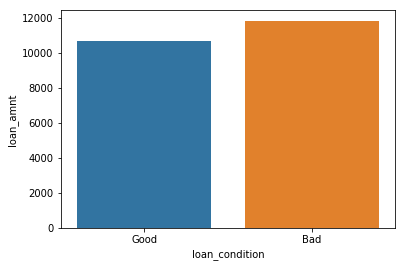

In [33]:
sns.barplot('loan_condition', 'loan_amnt', data=loan, palette='tab10', ci=None)

In [7]:
loan.groupby(['loan_condition'])['loan_amnt'].mean()

loan_condition
Bad     11828.348353
Good    10657.060840
Name: loan_amnt, dtype: float64

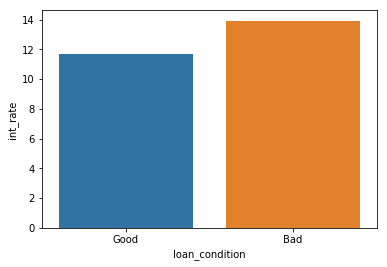

In [8]:
sns.barplot('loan_condition', 'int_rate', data=loan, palette='tab10', ci=None)

In [10]:
loan.groupby(['loan_condition'])['int_rate'].mean()

loan_condition
Bad     13.922523
Good    11.683758
Name: int_rate, dtype: float64

### Select important features

In [35]:
# Show Feature Importance
# This might help with "how" to feature engineering
# Get Feature Columns
feature_names = raw_model_data.columns

importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

for f in range(X.shape[1]):
    print("%s: feature importance (%f)" % (feature_names[indices[f]], importances[indices[f]]))

int_rate: feature importance (0.075017)
revol_util: feature importance (0.074076)
annual_inc: feature importance (0.073757)
dti: feature importance (0.071830)
revol_bal: feature importance (0.071691)
loan_amnt: feature importance (0.062278)
total_acc: feature importance (0.060904)
open_acc: feature importance (0.051793)
inq_last_6mths: feature importance (0.036435)
addr_state_WV: feature importance (0.021067)
home_ownership_OTHER: feature importance (0.013418)
purpose_wedding: feature importance (0.012278)
loan_condition_num: feature importance (0.011998)
sub_grade_G4: feature importance (0.011684)
purpose_vacation: feature importance (0.011480)
addr_state_AR: feature importance (0.011351)
purpose_other: feature importance (0.008357)
addr_state_DC: feature importance (0.008133)
emp_length_8 years: feature importance (0.008095)
purpose_medical: feature importance (0.007801)
sub_grade_G5: feature importance (0.007600)
emp_length_10+ years: feature importance (0.007599)
pub_rec: feature i